### Early Stage Diabetes Risk Prediction Dataset
Description:
This dataset contains information on the signs and symptoms of newly diagnosed diabetic patients or those at risk of developing diabetes. The data was collected through direct questionnaires administered to patients at the Sylhet Diabetes Hospital in Sylhet, Bangladesh, and approved by a doctor.

Import all the necessary Libraries

In [152]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Loading the Dataset

In [153]:
df = pd.read_csv("diabetes_data_upload.csv")
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [154]:
df.shape

(520, 17)

In [155]:
df.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


Age is the only numberical feature, rest all the features seem to be categorical.

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

Check for the null values

In [157]:
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

There are no null values in the dataset.

In [158]:
df.nunique()

Age                   51
Gender                 2
Polyuria               2
Polydipsia             2
sudden weight loss     2
weakness               2
Polyphagia             2
Genital thrush         2
visual blurring        2
Itching                2
Irritability           2
delayed healing        2
partial paresis        2
muscle stiffness       2
Alopecia               2
Obesity                2
class                  2
dtype: int64

All the features except Age seems to be categorical features.

Exploratory Data Analysis

In [159]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 1 numerical features : ['Age']

We have 16 categorical features : ['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity', 'class']


In [160]:
df['class'].value_counts()

class
Positive    320
Negative    200
Name: count, dtype: int64

There are 320 positive and 200 negative classes.

<Axes: xlabel='Age', ylabel='Count'>

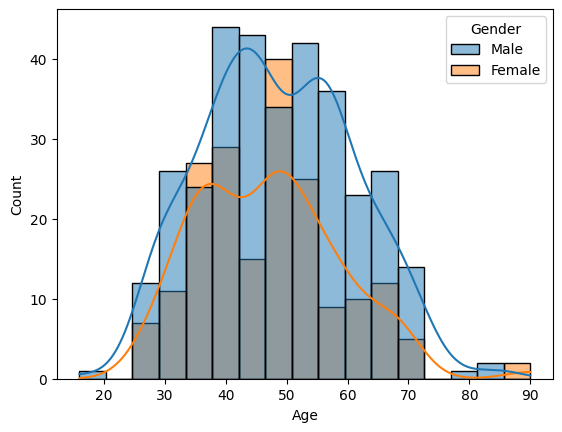

In [161]:
sns.histplot(data=df,x='Age',kde=True,hue='Gender')

We can see that the Male are higher distribution between 30-70

#### Filtering the dataframe with Diabetes and Non-Diabetes.

In [162]:
positive_data = df[df['class']=='Positive']
negative_data = df[df['class']=='Negative']


#### Cateorical Variables Comparison for the Diabetes Negative and Positive Patients

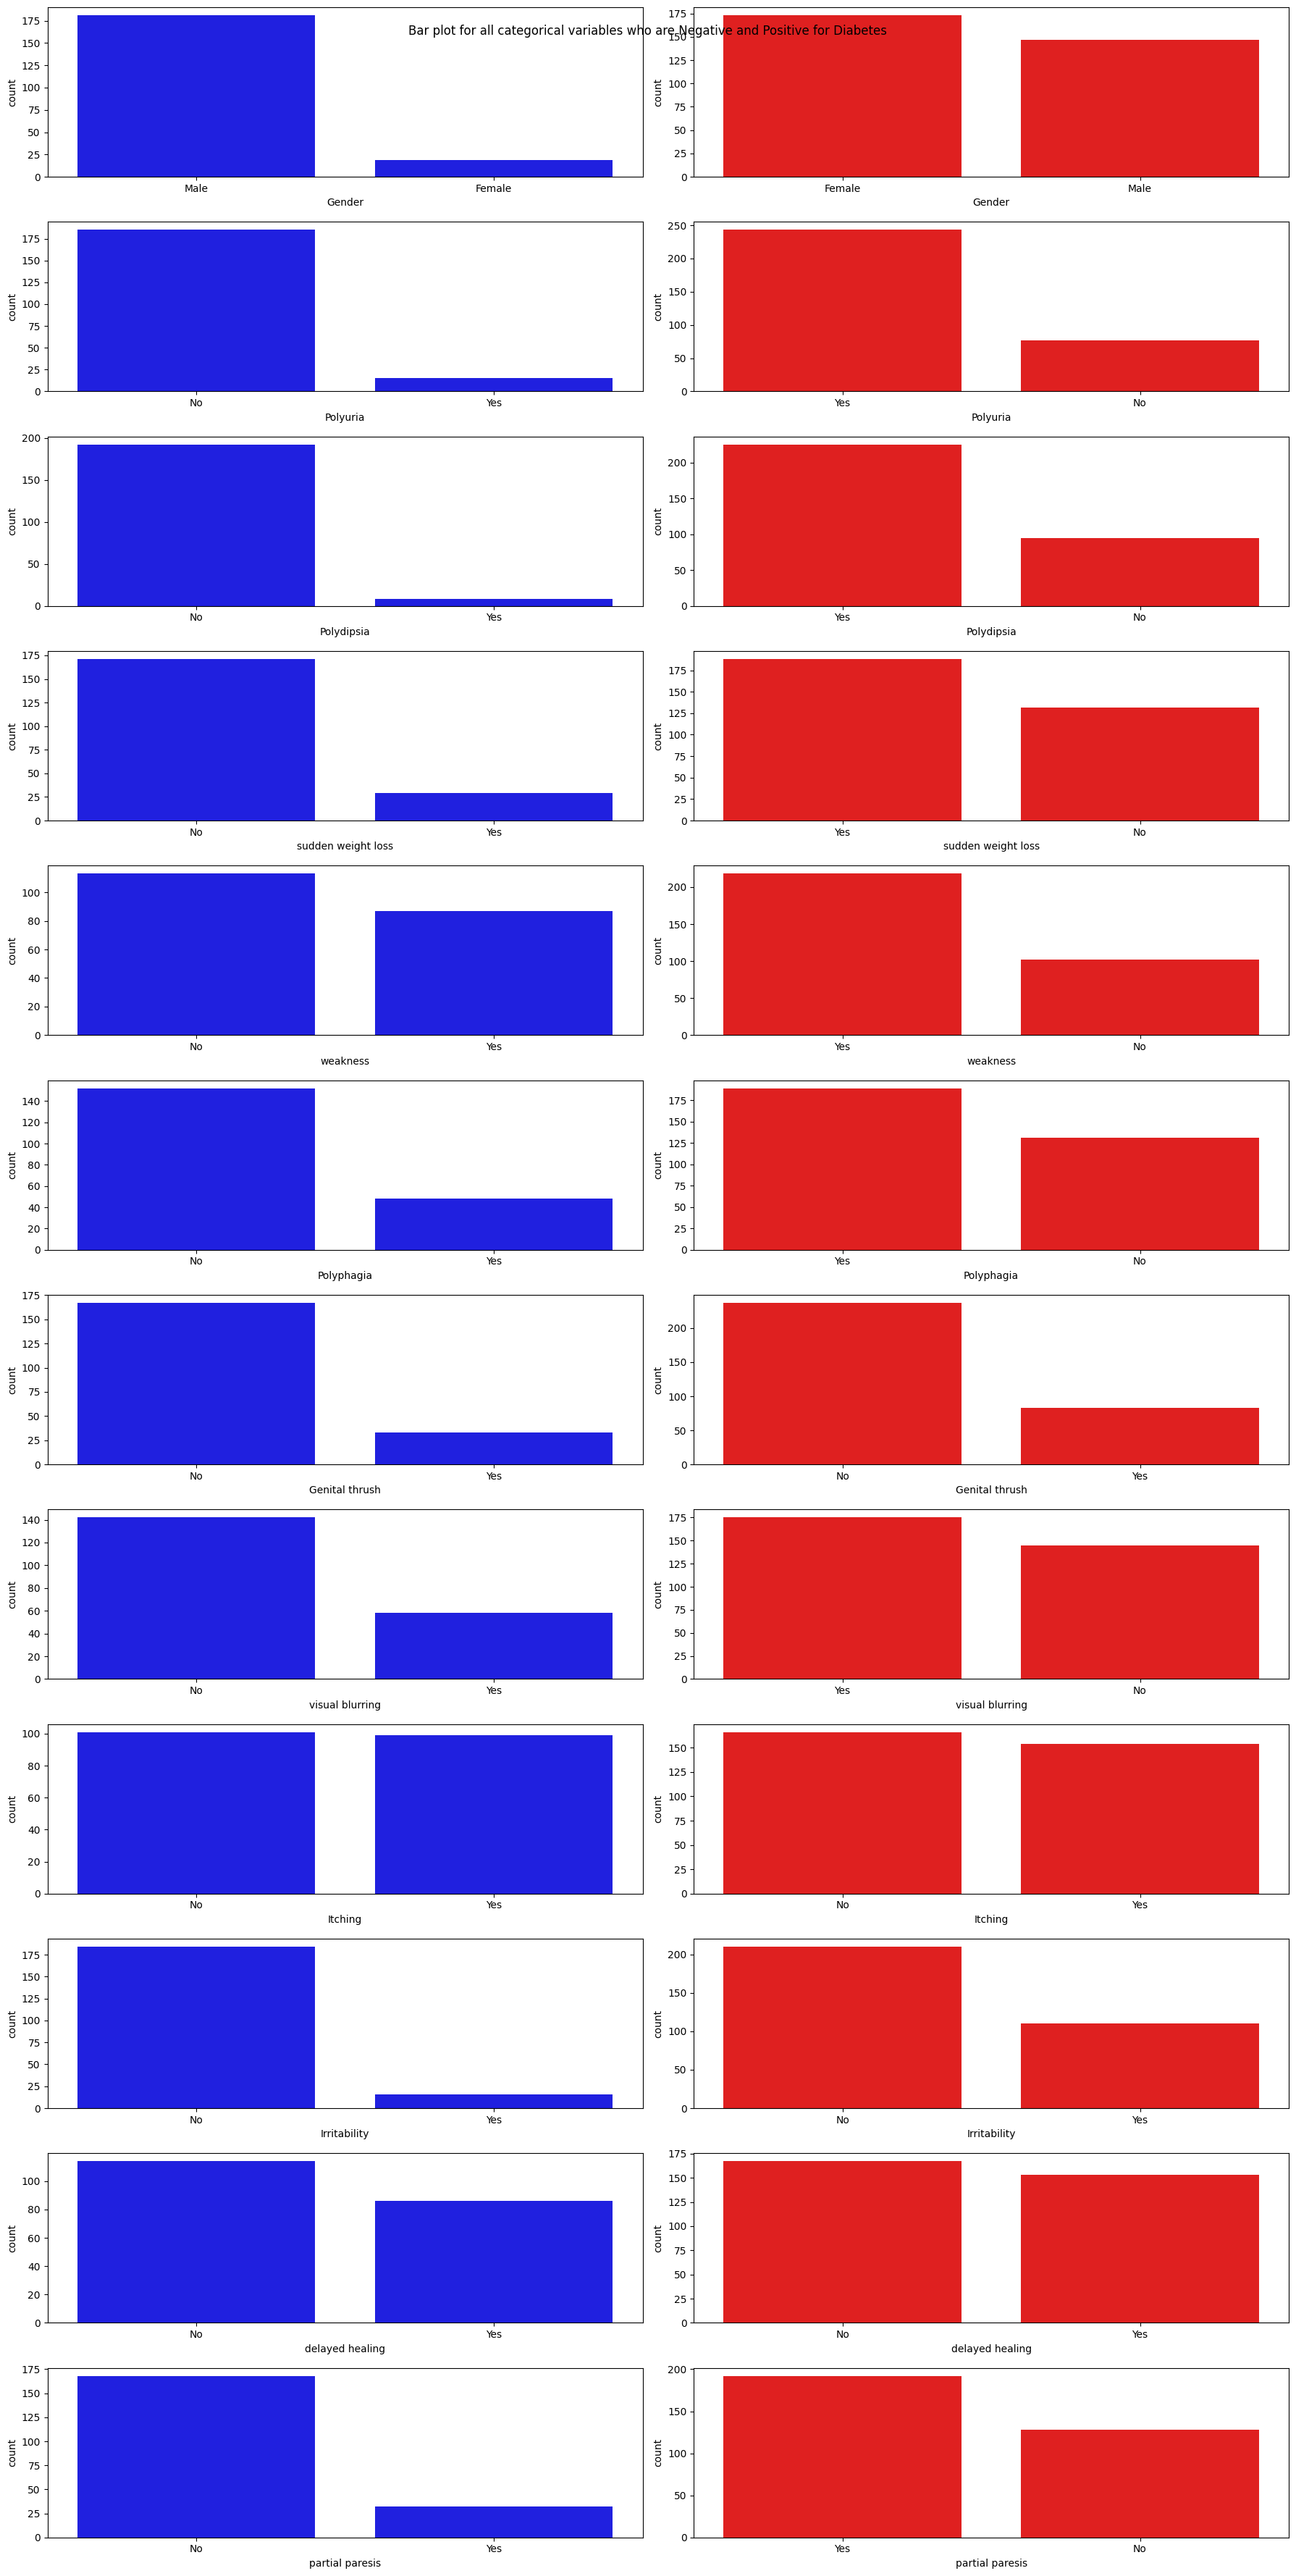

In [163]:
fig, axes = plt.subplots(12, 2, figsize=(18, 36))

fig.suptitle('Bar plot for all categorical variables who are Negative and Positive for Diabetes')

# Loop through the data to create count plots for each categorical variable
variables = ['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis']

for i, variable in enumerate(variables):
    sns.countplot(ax=axes[i, 0], x=variable, data=negative_data, color='blue', order=negative_data[variable].value_counts().index)
    sns.countplot(ax=axes[i, 1], x=variable, data=positive_data, color='red', order=positive_data[variable].value_counts().index)

plt.tight_layout()
plt.show()

#### From the above plot we can see the data for People who are positive and Negative for Diabetes.

1) Female are the highest positive cases.
2) These are high for Positive cases Polyuria, Polydipsia, sudden weight loss, weakness, Polyphagia, visual blurring & partial paresis

#### Imbalance Data on the Output feature 'class'

In [164]:
df['class'].value_counts()

class
Positive    320
Negative    200
Name: count, dtype: int64

In [165]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df['class'] == 'Positive']
df_minority = df[df['class'] == 'Negative']

# Upsample minority class
df_minority_upsampled = resample(df_minority, replace=True, n_samples=320, random_state=42)  # Upsample to match the majority class size

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display class counts after upsampling
print(df_upsampled['class'].value_counts())

class
Positive    320
Negative    320
Name: count, dtype: int64


We now have same number of Positive and Negative records which will not have a bias prediction

In [166]:
#shuffling the data set
from sklearn.utils import shuffle
df = shuffle(df_upsampled)

In [167]:
df['class'].value_counts()

class
Positive    320
Negative    320
Name: count, dtype: int64

Label Encoding the DataFrame for Model Building

In [168]:
from sklearn.preprocessing import LabelEncoder

def labelencoder(df):
    for i in df.columns:
        if df[i].dtype=='object': 
            df[i] = df[i].fillna('N')
            lbl = LabelEncoder()
            lbl.fit(list(df[i].values))
            df[i] = lbl.transform(df[i].values)
    return df


In [169]:
data = labelencoder(df)
data.head()


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
414,55,0,1,1,1,1,0,0,1,0,0,0,1,0,0,1,1
344,61,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1
468,40,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
153,57,1,0,1,0,1,0,1,1,0,1,1,1,1,1,0,1
262,48,1,1,1,1,0,1,1,0,0,0,1,0,0,0,0,1


Saving the new Dataframe to a file.

In [170]:
data.to_csv('cleaned_diabetes_data.csv')

#### HeatMap to find Correation between the variables.

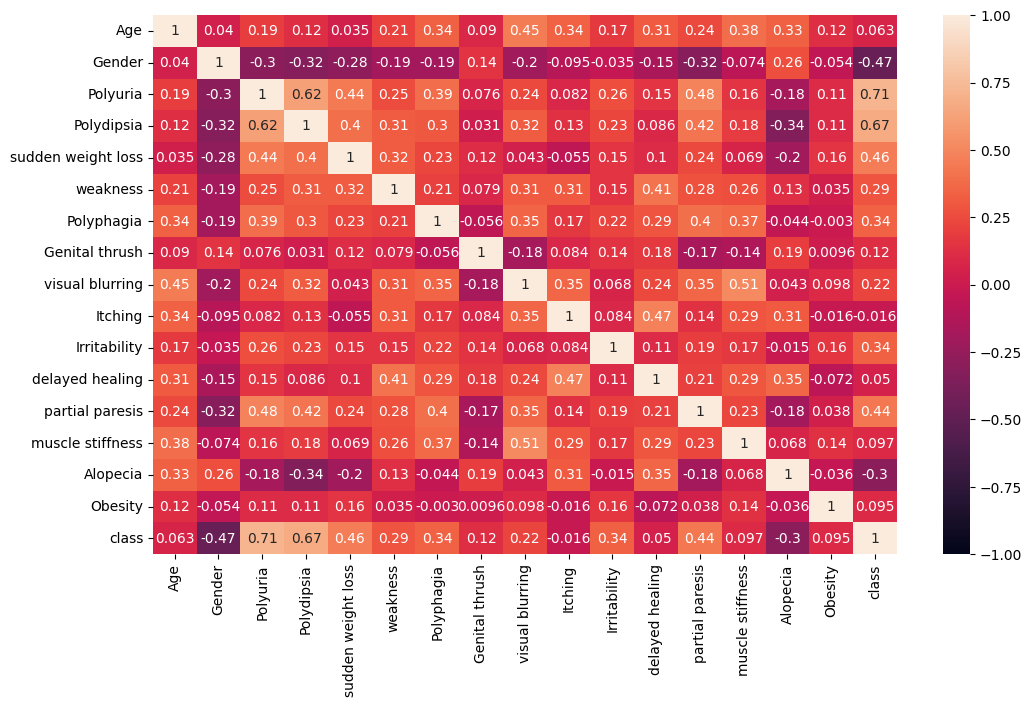

In [171]:
plt.figure(figsize=(12, 7))
sns.heatmap(data.corr(), annot = True, vmin = -1, vmax = 1)
plt.show()


Checking the features which are correlated and which are not correlated.

In [172]:
correlation_matrix = data.corr()

# Extract correlations with the 'class' feature
class_correlations = correlation_matrix['class'].drop('class')  # Exclude 'class' from the correlations

# Features positively correlated with 'class' (correlation > 0)
positively_correlated_features = class_correlations[class_correlations > 0].index.tolist()

# Features negatively correlated with 'class' (correlation < 0)
negatively_correlated_features = class_correlations[class_correlations < 0].index.tolist()

print("Features positively correlated with 'class':", positively_correlated_features)
print("Features negatively correlated with 'class':", negatively_correlated_features)

Features positively correlated with 'class': ['Age', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Obesity']
Features negatively correlated with 'class': ['Gender', 'Itching', 'Alopecia']
